In [62]:
using GraphPPL, ReactiveMP, Distributions
using Plots

In [63]:
# Generate toy dataset
T = 15
x_0_data = 0.6
a_data = 1.2

x_data = Vector{Float64}(undef, T)
y_data = Vector{Float64}(undef, T)

x_t_min_data = x_0_data
for t=1:T
    x_data[t] = a_data*x_t_min_data
    y_data[t] = ceil(x_data[t])
    
    x_t_min_data = x_data[t]
end    
;

In [64]:
# Specify forward transition
f(x_t_min::Float64, a::Float64) = a*x_t_min


@model function NKS(n)
    o = datavar(Float64, n)
    z = randomvar(n)
    a = randomvar(n)

    z_0 ~ Normal(μ=0.0, γ=1.0)
    z_prev = z_0
    for i in 1:n
        a[i] ~ Normal(μ=1.0, γ=2.0)
        z[i] ~ f(z_prev, a[i]) where {meta=UT()}
        o[i] ~ Normal(μ=z[i], σ²=0.2)

        z_prev = z[i]
    end
end

In [65]:
imarginals = (z_0 = MvNormal(zeros(2), diageye(2)), )
n = length(y_data)
result = inference(model = Model(NKS, n), data=(o=y_data,), free_energy=false);

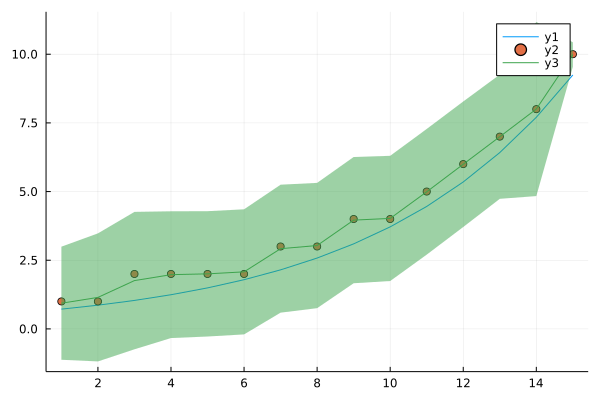

In [66]:

plot(x_data)
scatter!(y_data)
plot!(mean.(result.posteriors[:z]), ribbon=sqrt.(var.(result.posteriors[:z])))

### ET

In [67]:
function f(x)
    return sqrt.(x)
end

function f_inv(x)
    return x .^ 2
end


@model function NKS()
    y2 = datavar(Float64)
    c = zeros(2); c[1] = 1.0;

    x ~ MvNormal(μ=ones(2), Λ=diageye(2))
    z ~ f(x) where {meta=ET(inverse=f_inv)}
    y1 ~ Normal(μ=dot(z, c), σ²=1.0)
    y2 ~ Normal(μ=y1, σ²=0.5)
end

In [68]:
imarginals = (x = MvNormal(zeros(2), diageye(2)), )

result = inference(model = Model(NKS), data=(y2=4.0,), free_energy=false)

Inference results:
-----------------------------------------
y1 = NormalWeightedMeanPrecision{Float64}(xi=8.8, w=2.8)
x  = MvNormalWeightedMeanPrecision(
xi: [1.1666666666669165, 1.0]
Λ: [1.0104166666667...


In [69]:
mean(result.posteriors[:x])

2-element Vector{Float64}:
 1.1546391752579255
 0.4999999999999999

In [70]:
function f(x)
    return sqrt.(x)
end


@model function NKS()
    y2 = datavar(Float64)
    c = zeros(2); c[1] = 1.0;

    x ~ MvNormal(μ=ones(2), Λ=diageye(2))
    z ~ f(x) where {meta=ET()}
    y1 ~ Normal(μ=dot(z, c), σ²=1.0)
    y2 ~ Normal(μ=y1, σ²=0.5)
end

In [71]:
imarginals = (x = MvNormal(zeros(2), diageye(2)), )

result = inference(model = Model(NKS), data=(y2=1.0,), free_energy=false)

Inference results:
-----------------------------------------
y1 = NormalWeightedMeanPrecision{Float64}(xi=2.8, w=2.8)
x  = MvNormalWeightedMeanPrecision(
xi: [1.1666666666664167, 0.99999999999975]
Λ: [1....


In [72]:
mean(result.posteriors[:x])

2-element Vector{Float64}:
 0.9999999999995713
 0.9999999999995

In [73]:
function f(x, θ)
    return x .+ θ
end

function f_x(θ, z)
    return z .- θ
end

function f_θ(x, z)
    return z .- x
end

c = randn(2);

@model function NKS()
    y2 = datavar(Float64)
    c = zeros(2); c[1] = 1.0;

    θ ~ MvNormal(μ=ones(2), Λ=diageye(2))
    x ~ MvNormal(μ=zeros(2), Λ=diageye(2))
    z ~ f(x, θ) where {meta=ET(inverse=(f_x, f_θ))}
    y1 ~ Normal(μ=dot(z, c), σ²=1.0)
    y2 ~ Normal(μ=y1, σ²=0.5)
end

In [74]:
imarginals = (x = MvNormal(zeros(2), diageye(2)), )

result = inference(model = Model(NKS), data=(y2=1.0,), free_energy=false)

Inference results:
-----------------------------------------
y1 = NormalWeightedMeanPrecision{Float64}(xi=2.3333333333333335, w=2.3333333333333335...
θ  = MvNormalWeightedMeanPrecision(
xi: [0.60000000000024, 1.0]
Λ: [1.40000000000036 ...
x  = MvNormalWeightedMeanPrecision(
xi: [5.999645225079745e-13, 9.99999999999e-13]
Λ:...


In [75]:
function f(x, θ, ζ)
    return x .+ θ .+ ζ
end


@model function NKS()
    y2 = datavar(Float64)
    c = zeros(2); c[1] = 1.0;

    θ ~ MvNormal(μ=ones(2), Λ=diageye(2))
    ζ ~ MvNormal(μ=0.5ones(2), Λ=diageye(2))
    x ~ MvNormal(μ=zeros(2), Λ=diageye(2))
    z ~ f(x, θ, ζ) where {meta=ET()}
    y1 ~ Normal(μ=dot(z, c), σ²=1.0)
    y2 ~ Normal(μ=y1, σ²=0.5)
end

In [76]:
imarginals = (x = MvNormal(zeros(2), diageye(2)), )

result = inference(model = Model(NKS), data=(y2=1.0,), free_energy=false)

Inference results:
-----------------------------------------
y1 = NormalWeightedMeanPrecision{Float64}(xi=2.375, w=2.25)
ζ  = MvNormalWeightedMeanPrecision(
xi: [0.4999999999995714, 0.49999999999900013]
Λ: ...
θ  = MvNormalWeightedMeanPrecision(
xi: [1.1428571428568057, 0.9999999999995002]
Λ: [...
x  = MvNormalWeightedMeanPrecision(
xi: [-0.14285714285766313, -1.499911306270087e-12...


### UT

In [77]:
function f(x)
    return x
end

function f_inv(x)
    return x
end

c = randn(2);

@model function NKS()
    y2 = datavar(Float64)
    c = zeros(2); c[1] = 1.0;

    x ~ MvNormal(μ=zeros(2), Λ=diageye(2))
    z ~ f(x) where {meta=UT(inverse=f_inv)}
    y1 ~ Normal(μ=dot(z, c), σ²=1.0)
    y2 ~ Normal(μ=y1, σ²=0.5)
end

In [78]:
imarginals = (x = MvNormal(zeros(2), diageye(2)), )

result = inference(model = Model(NKS), data=(y2=1.0,), free_energy=false)

Inference results:
-----------------------------------------
y1 = NormalWeightedMeanPrecision{Float64}(xi=2.0, w=2.5)
x  = MvNormalWeightedMeanPrecision(
xi: [0.6666666666676693, 0.0]
Λ: [1.6666666666676...


In [79]:
function f(x)
    return x.^2
end

c = randn(2);

@model function NKS()
    y2 = datavar(Float64)
    c = zeros(2); c[1] = 1.0;

    x ~ MvNormal(μ=zeros(2), Λ=diageye(2))
    z ~ f(x) where {meta=UT()}
    y1 ~ Normal(μ=dot(z, c), σ²=1.0)
    y2 ~ Normal(μ=y1, σ²=0.5)
end

In [80]:
imarginals = (x = MvNormal(zeros(2), diageye(2)), )

result = inference(model = Model(NKS), data=(y2=1.0,), free_energy=false)

Inference results:
-----------------------------------------
y1 = NormalWeightedMeanPrecision{Float64}(xi=2.3333332222149457, w=2.3333332222149457...
x  = MvNormalWeightedMeanPrecision(
xi: [0.0, 0.0]
Λ: [1.0 0.0; 0.0 1.0]
)



In [81]:
function f(x, θ)
    return x .+ θ
end

function f_x(θ, z)
    return z .- θ
end

function f_θ(x, z)
    return z .- x
end

c = randn(2);

@model function NKS()
    y2 = datavar(Float64)
    c = zeros(2); c[1] = 1.0;

    θ ~ MvNormal(μ=ones(2), Λ=diageye(2))
    x ~ MvNormal(μ=zeros(2), Λ=diageye(2))
    z ~ f(x, θ) where {meta=UT(inverse=(f_x, f_θ))}
    y1 ~ Normal(μ=dot(z, c), σ²=1.0)
    y2 ~ Normal(μ=y1, σ²=0.5)
end

In [82]:
imarginals = (x = MvNormal(zeros(2), diageye(2)), )

result = inference(model = Model(NKS), data=(y2=1.0,), free_energy=false)

Inference results:
-----------------------------------------
y1 = NormalWeightedMeanPrecision{Float64}(xi=2.333333333352748, w=2.3333333333333455)...
θ  = MvNormalWeightedMeanPrecision(
xi: [0.5999999999880001, 1.0]
Λ: [1.4000000000003...
x  = MvNormalWeightedMeanPrecision(
xi: [-1.0511773545936107e-11, 1.0000000167191506e...


In [83]:
function f(x, θ)
    return x .+ θ
end

c = randn(2);

@model function NKS()
    y2 = datavar(Float64)
    c = zeros(2); c[1] = 1.0;

    θ ~ MvNormal(μ=ones(2), Λ=diageye(2))
    x ~ MvNormal(μ=zeros(2), Λ=diageye(2))
    z ~ f(x, θ) where {meta=UT()}
    y1 ~ Normal(μ=dot(z, c), σ²=1.0)
    y2 ~ Normal(μ=y1, σ²=0.5)
end

In [84]:
imarginals = (x = MvNormal(zeros(2), diageye(2)), )

result = inference(model = Model(NKS), data=(y2=1.0,), free_energy=false)

Inference results:
-----------------------------------------
y1 = NormalWeightedMeanPrecision{Float64}(xi=2.333333333352748, w=2.3333333333333455)...
θ  = MvNormalWeightedMeanPrecision(
xi: [0.5999999999894395, 0.9999999999979999]
Λ: [...
x  = MvNormalWeightedMeanPrecision(
xi: [-1.023561235768417e-11, -9.999778782789055e-...
